## Решение задачи регрессии с помощью нейронных сетей


#Необходимые ресурсы

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных

**Загружаем данные**

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/ebw_data.csv')

In [5]:
data

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48
...,...,...,...,...,...,...
67,44,146,9.0,60,1.20,1.72
68,45,146,9.0,60,1.36,1.76
69,45,146,9.0,60,1.28,1.76
70,45,146,9.0,60,1.28,1.76


In [6]:
X1, y1 = data.drop(['Depth', 'Width'], axis=1), data[['Depth']]
X2, y2 = data.drop(['Depth', 'Width'], axis=1), data[['Width']]

In [7]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=.8, random_state=17)

**Просмотр данных**

In [9]:
type(x_train)

pandas.core.frame.DataFrame

In [10]:
x_train.shape

(14, 4)

In [11]:
x_test.shape

(58, 4)

In [12]:
x_train[:3]

,IW,IF,VW,FP
17,46,141,10.0,80
46,46,146,10.0,60
1,47,139,4.5,80


In [13]:
y_train[:3]

,Depth
17,1.00
46,1.36
1,1.62


**Нормализация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [14]:
# Среднее значение для обучающего набора данных
mean = x_train.mean(axis=0)
# Стандартное отклонение для обучающего набора данных
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

Конфигурация сети из примера - https://www.tensorflow.org/tutorials/keras/basic_regression

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu'))
#model.add(Dense(1)) # если допускаются отрицательные значения
model.add(Dense(1, activation='relu'))

In [17]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,865
Trainable params: 12,865
Non-trainable params: 0
_________________________________________________________________
None


**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [18]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Обучаем нейронную сеть



In [19]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=200, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/200
1/1 - 4s - loss: 2.9121 - mae: 1.2659 - val_loss: 3.0212 - val_mae: 1.3056 - 4s/epoch - 4s/step
Epoch 2/200
1/1 - 0s - loss: 2.7655 - mae: 1.2288 - val_loss: 2.7321 - val_mae: 1.2062 - 30ms/epoch - 30ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4538 - mae: 1.1023 - val_loss: 2.4943 - val_mae: 1.1175 - 31ms/epoch - 31ms/step
Epoch 4/200
1/1 - 0s - loss: 2.1913 - mae: 0.9770 - val_loss: 2.2778 - val_mae: 1.0296 - 26ms/epoch - 26ms/step
Epoch 5/200
1/1 - 0s - loss: 1.9717 - mae: 0.8568 - val_loss: 2.0659 - val_mae: 0.9347 - 24ms/epoch - 24ms/step
Epoch 6/200
1/1 - 0s - loss: 1.7797 - mae: 0.7605 - val_loss: 1.8782 - val_mae: 0.8410 - 25ms/epoch - 25ms/step
Epoch 7/200
1/1 - 0s - loss: 1.6049 - mae: 0.6607 - val_loss: 1.7065 - val_mae: 0.7451 - 24ms/epoch - 24ms/step
Epoch 8/200
1/1 - 0s - loss: 1.4571 - mae: 0.5529 - val_loss: 1.5596 - val_mae: 0.6520 - 23ms/epoch - 23ms/step
Epoch 9/200
1/1 - 0s - loss: 1.3452 - mae: 0.4494 - val_loss: 1.4407 - val_mae: 0.5668 - 23ms/epoch - 23ms/s

## Проверяем работу модели на тестовом наборе данных

In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 7ms/step - loss: 0.1213 - mae: 0.1525


In [21]:
scores

[0.12134309113025665, 0.15249623358249664]

In [22]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 0.1525


## Визуализация качества обучения

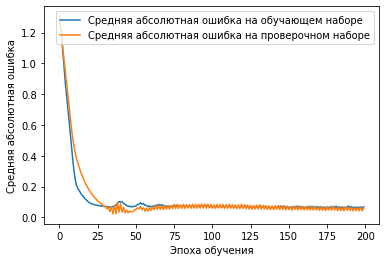

In [23]:
plt.plot(history.history['mae'], # mean_absolute_error
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], # val_mean_absolute_error
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [24]:
pred = model.predict(x_test).flatten()

2/2 [==============================] - 0s 4ms/step


In [25]:
print(pred)

[1.1999853 0.9923443 1.455881  1.176452  1.78823   1.5395525 1.2721355
 1.176452  1.0801076 1.455881  0.9923443 1.2721355 1.455881  0.9923443
 0.8564732 1.0140499 1.78823   1.0140499 1.683825  1.5395525 1.0760972
 1.5395525 1.0801076 1.386649  1.2721355 1.2721355 1.78823   1.0760972
 1.3011518 1.0940331 1.0940331 1.78823   1.0940331 1.1999853 1.455881
 1.176452  1.0140499 1.2721355 1.0760972 1.5395525 1.2721355 1.2721355
 1.683825  1.0801076 0.8564732 1.2721355 1.2721355 1.5395525 1.3011518
 1.2721355 0.8564732 1.0940331 1.3011518 1.5395525 1.0801076 1.176452
 1.2721355 0.9923443]
